In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [9]:
# -----------------------
# 1. Generate synthetic data
# -----------------------
timesteps = 200
t = np.arange(timesteps)
data = np.sin(0.1 * t) + np.random.normal(0, 0.1, timesteps)
df = pd.DataFrame({'value': data})
df

,value
0,-0.080953
1,0.138038
2,0.333022
3,0.482843
4,0.317077
...,...
195,0.559876
196,0.728745
197,0.779047
198,0.683837


In [ ]:
# -----------------------
# 2. Scale data
# -----------------------
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['value']])

In [6]:
# -----------------------
# 3. Create sequences
# -----------------------
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [7]:
# -----------------------
# 4. Build LSTM model
# -----------------------
model = Sequential([
    LSTM(50, input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

# -----------------------
# 5. Train the model
# -----------------------
history = model.fit(X, y, epochs=20, batch_size=16, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
12/12 [==============================] - 1s 3ms/step - loss: 0.1446
Epoch 2/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0352
Epoch 3/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 4/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0244
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0224
Epoch 6/20
12/12 [=

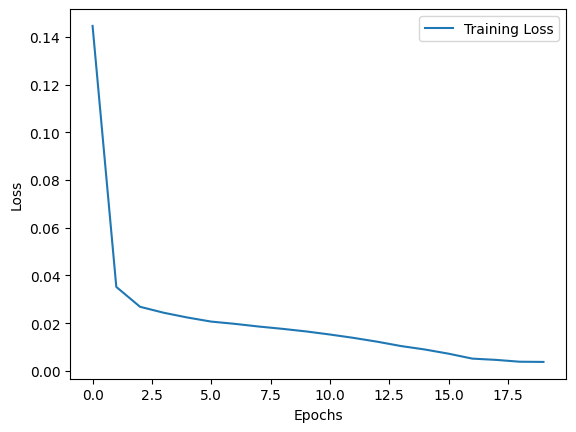

In [8]:
# -----------------------
# 6. Plot training loss
# -----------------------
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
